In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [3]:
airlines = pd.read_excel("EastWestAirlines .xlsx",sheet_name='data')
airlines 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
def norm_func(i):
    x=(i-i.min()) / (i.max()-i.min())
    return(x)

In [7]:
def_norm = norm_func(airlines.iloc[:,1:])

In [8]:
def_norm.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


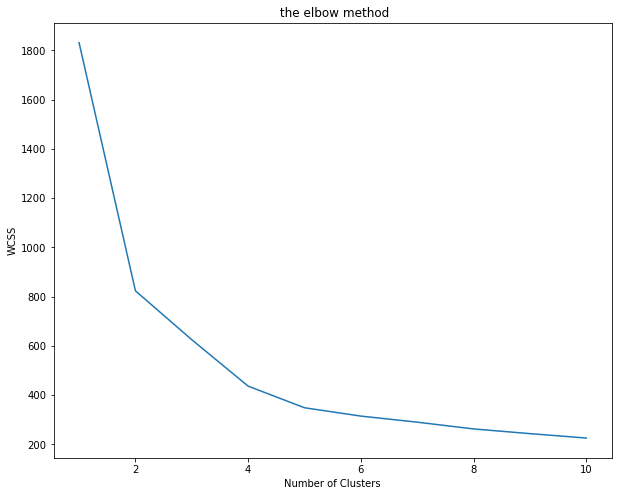

In [9]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10,8))
WCSS = []
for i in range (1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(def_norm)
    WCSS.append(clf.inertia_) 
plt.plot(range(1,11),WCSS) 
plt.title(' the elbow method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [10]:
clf = KMeans(n_clusters=5)
y_Kmeans = clf.fit_predict(def_norm)

In [11]:
y_Kmeans
clf.labels_

array([4, 4, 4, ..., 0, 2, 2])

In [12]:
y_Kmeans

array([4, 4, 4, ..., 0, 2, 2])

In [13]:
clf.cluster_centers_

array([[ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -4.99600361e-16],
       [ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01,  3.94129174e-15],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
  

In [14]:
clf.inertia_

348.94332172541357

In [15]:
md = pd.Series(y_Kmeans)
airlines['clust'] = md
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [17]:
airlines.iloc[:,1:7].groupby(airlines.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
clust,,,,,,
0,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178
1,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204
2,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349
3,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245
4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885


Text(0.5, 1.0, 'clusters using kmeans')

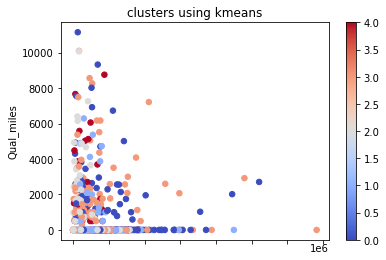

In [18]:
airlines.plot(x="Balance",y="Qual_miles",c=clf.labels_,kind="scatter",s=30, cmap=plt.cm.coolwarm)
plt.title('clusters using kmeans')

Text(0.5, 1.0, 'clusters using kmeans')

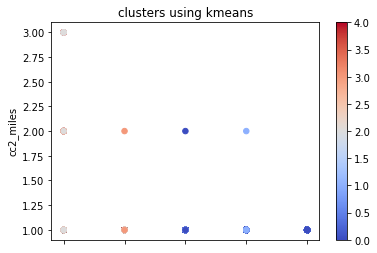

In [21]:
airlines.plot(x="cc1_miles",y="cc2_miles",c=clf.labels_,kind="scatter",s=30, cmap=plt.cm.coolwarm)
plt.title('clusters using kmeans')

Text(0.5, 1.0, 'clusters using kmeans')

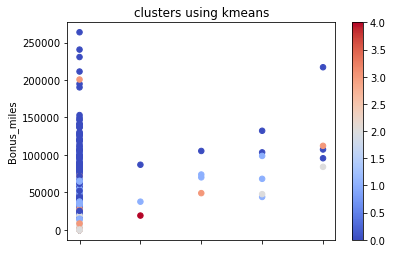

In [22]:
airlines.plot(x="cc3_miles",y="Bonus_miles",c=clf.labels_,kind="scatter",s=30, cmap=plt.cm.coolwarm)
plt.title('clusters using kmeans')

In [25]:
WCSS

[1830.7932128584112,
 823.6756984125205,
 625.1684881570719,
 436.7088576193262,
 348.9433217254136,
 315.15129723162903,
 290.4671543753862,
 263.0500006387329,
 243.91664703659063,
 226.1096920168461]

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [30]:
df = pd.read_excel("EastWestAirlines .xlsx",sheet_name='data')

In [35]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [33]:
df
print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [37]:
array = df.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [39]:
stscaler = StandardScaler().fit(array)
x = stscaler.transform(array)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [68]:
dbscan = DBSCAN(eps=1.485, min_samples=20)
dbscan.fit(x)

DBSCAN(eps=1.485, min_samples=20)

In [41]:
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [43]:
d1 = pd.DataFrame(dbscan.labels_,columns=['clusters'])
d1

,clusters
0,0
1,0
2,0
3,0
4,-1
...,...
3994,-1
3995,-1
3996,-1
3997,0


In [46]:
d2 = pd.concat([df,d1],axis=1)
d2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,-1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,-1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,-1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [50]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic')

Text(0.5, 1.0, 'clusters using dbscan')

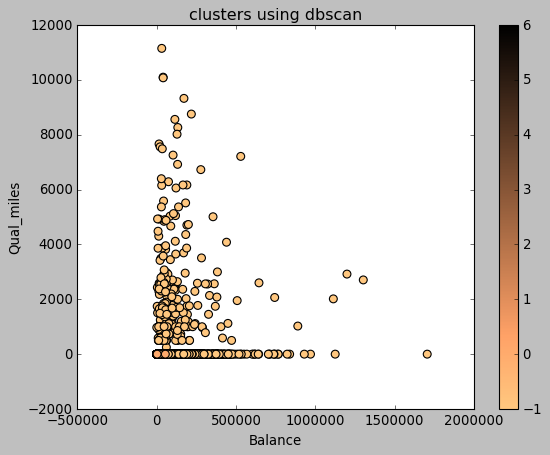

In [51]:
d2.plot(x="Balance", y="Qual_miles",c=dbscan.labels_,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title('clusters using dbscan')

Text(0.5, 1.0, 'clusters using dbscan')

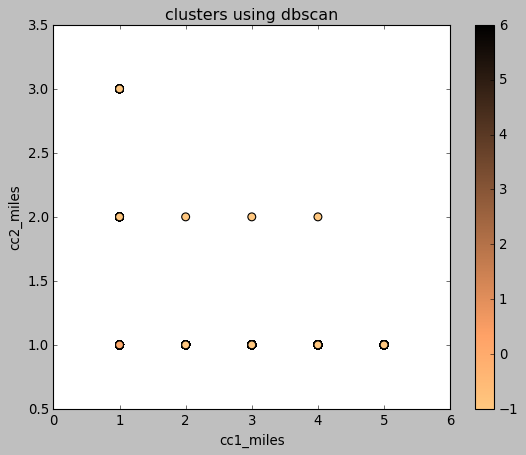

In [52]:
d2.plot(x="cc1_miles", y="cc2_miles",c=dbscan.labels_,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title('clusters using dbscan')

Text(0.5, 1.0, 'clusters using dbscan')

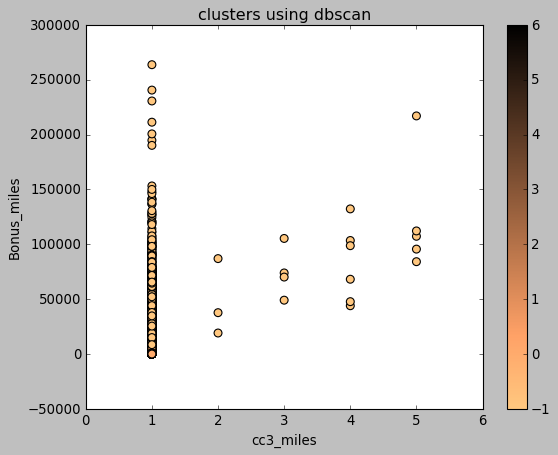

In [53]:
d2.plot(x="cc3_miles", y="Bonus_miles",c=dbscan.labels_,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title('clusters using dbscan')

In [54]:
d3 = dbscan.labels_

In [57]:
import sklearn.metrics
sklearn.metrics.silhouette_score(x,d1)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.2432027373622082

In [59]:
from sklearn.cluster import KMeans 
clf = KMeans(n_clusters=5)
y_Kmeans = clf.fit_predict(x)

In [60]:
y_Kmeans

array([3, 3, 3, ..., 1, 1, 1])

In [62]:
cl1=pd.DataFrame(y_Kmeans,columns=['kcluster'])
cl1

,kcluster
0,3
1,3
2,3
3,3
4,0
...,...
3994,1
3995,1
3996,1
3997,1


In [63]:
df2 = pd.concat([d1,cl1],axis=1)
df2

,clusters,kcluster
0,0,3
1,0,3
2,0,3
3,0,3
4,-1,0
...,...,...
3994,-1,1
3995,-1,1
3996,-1,1
3997,0,1


In [64]:
sklearn.metrics.silhouette_score(x,y_Kmeans)

0.23892741337042311

In [65]:
from sklearn.neighbors import NearestNeighbors

In [66]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

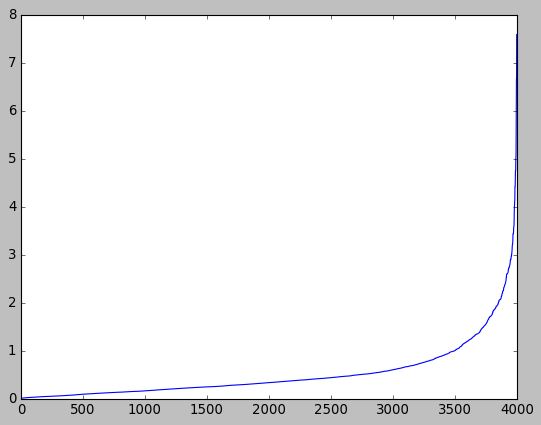

In [67]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [71]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
airlines = pd.read_excel("EastWestAirlines .xlsx",sheet_name='data')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [74]:
df_norm = norm_fun(airlines.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [72]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(airlines.iloc[:,1:]))
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


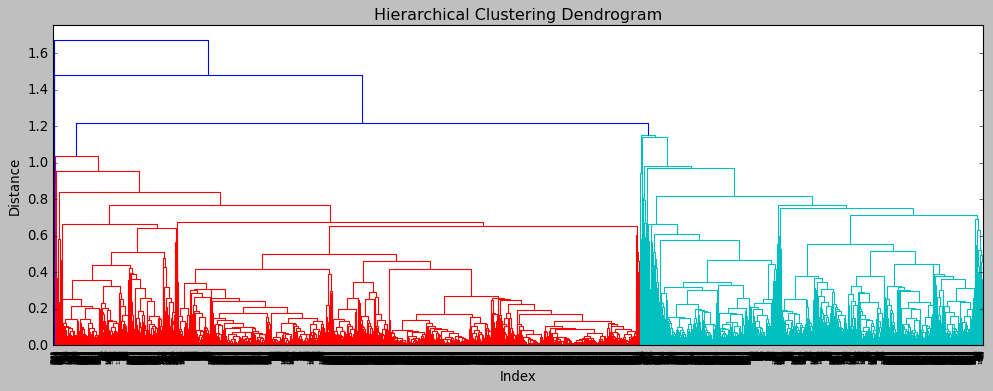

In [76]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()     

In [78]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airlines['clust']=cluster_labels # creating a  new column and assigning it to new column 
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [79]:
airlines.iloc[:,1:].groupby(airlines.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,9.597426e+04,240.572888,2.656676,1.015668,1.000681,28342.702997,15.547003,804.152589,2.461853,4627.118529,1.0,0.0
1,5.980784e+04,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.0
2,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0,2.0
3,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0,3.0
4,7.656512e+04,147.750000,3.875000,1.000000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000,1.0,4.0


In [86]:
data1 = airlines[(airlines.clust==3)]
data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,3
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,3
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,3


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
airlines_subset = pd.DataFrame(scaler.fit_transform(airlines.iloc[:,1:7]))
airlines_subset    

,0,1,2,3,4,5
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121
...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286


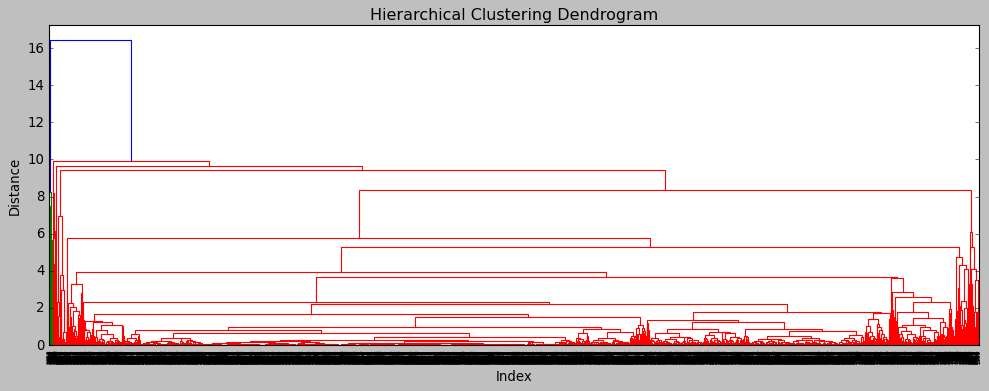

In [89]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 
z = linkage(airlines_subset, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()       

In [92]:
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(airlines_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airlines['clust']=cluster_labels 
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [93]:
airlines.iloc[:,1:].groupby(airlines.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,7.028220e+04,143.213357,2.060413,1.000000,1.000765,16497.465460,11.431303,449.095590,1.331889,4107.704053,0.366811,0.0
1,1.380614e+05,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,1.0
2,1.013331e+06,1118.727273,1.909091,1.000000,1.000000,24584.090909,18.181818,2753.909091,9.909091,6888.909091,0.909091,2.0
3,3.479100e+05,0.000000,4.428571,1.000000,1.000000,218811.000000,25.142857,2145.000000,5.714286,5706.571429,1.000000,3.0
4,6.887658e+04,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,4.0


In [96]:
data2 = airlines[(airlines.clust==1)]
data2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,1
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,1
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,1
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,1
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,1
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,1
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,1
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,1
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,1
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,1


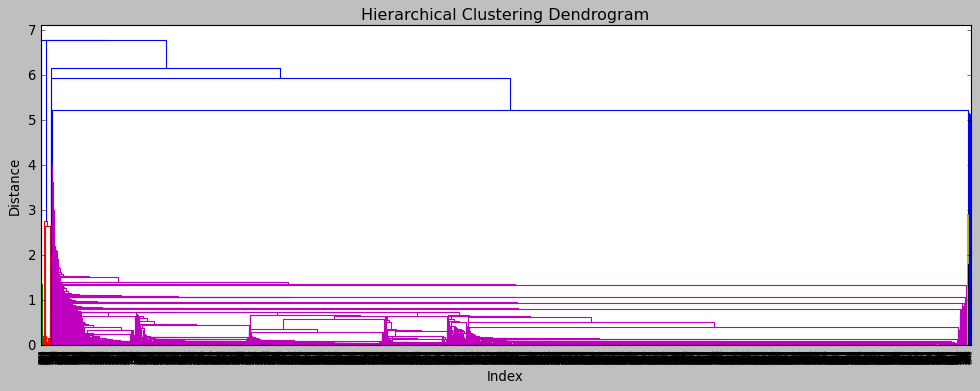

In [98]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 
z = linkage(airlines_subset, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()    

In [99]:
data3 = airlines[(airlines.clust==1)]
data3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,1
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,1
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,1
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,1
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,1
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,1
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,1
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,1
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,1
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,1
